# Метод конечных разностей (колебание струны)

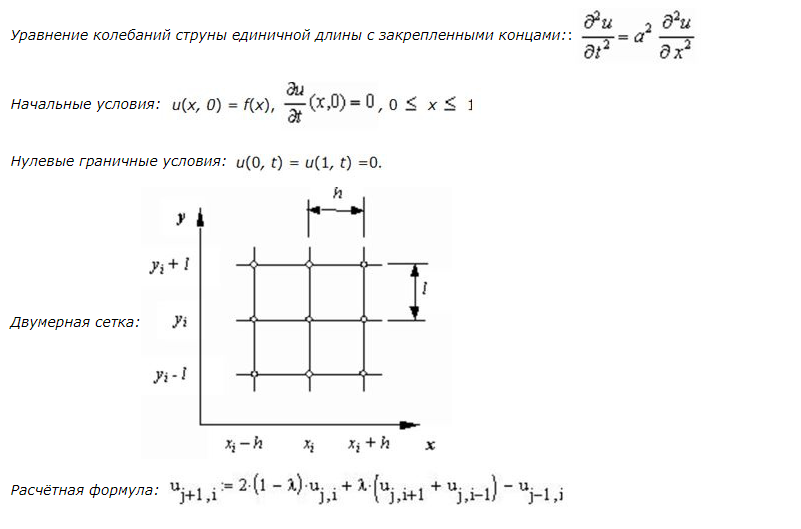

**Для решения задачи нужно построить сетку из 11 узлов по x (i = 0, 1,… 10) и провести вычисления для 16 слоев по t (j = 0, 1,… 16). Вычисления выполнить с шагом h по х, равным 0.1 и шагом t по t, равным 0.05.**

Для начальных условий f(x), например, для электромагнитной системы импульсного возбуждения f(x)=x**3-x.

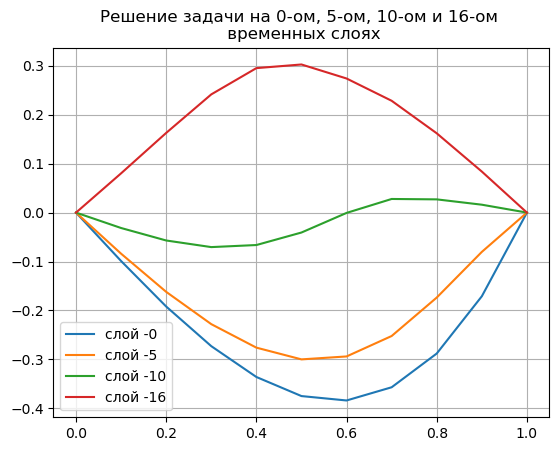

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h= 0.1 #шаг по x  
t= 0.05 #шаг по t 
a= 1 #отношение начального натяжения T к массе единице длинны
l= (a*t/h)**2 #расчётный коэффициент
n= 11 #сетка из 11 узлов по x (i = 0, 1, ... 10) 
m= 17 #провести вычисления для 16 слоев по t (j = 0, 1, ... 16).
x= [h*i for i in range(0,n)] # координата x
U= np.zeros([m,n]) # матрица для размещения расчётных значений
for j in range(0,m):  #внесение условий         
    for i in range(0,n):                  
        U[0,i]= x[i]**3-x[i] #начальные условия                                      
        U[1,i]= U[0,i] #начальные условия    
        U[j,0]= 0 #граничные условия   
        U[j,10]= 0 #граничные условия   
for j in range(1,m-1): #внесение решения            
       for i in range(1,n-1):
                U[j+1,i]=2*(1-l)*U[j,i]+l*(U[j,i+1]+U[j,i-1])-U[j-1,i]
                
y0=[];y5=[];y10=[];y16=[]#списки для вывода слоёв

for i in range(0,n):
    y0.append(U[0,i])
    y5.append(U[5,i])
    y10.append(U[10,i])
    y16.append(U[16,i])
    
plt.title('Решение задачи на 0-oм, 5-ом, 10-ом и 16-ом \n временных слоях', size=12)         
plt.plot(x, y0, label="слой -0")
plt.plot(x, y5, label="слой -5")
plt.plot(x, y10, label="слой -10")
plt.plot(x, y16, label="слой -16")
plt.legend()
plt.grid()
plt.show()   